In [14]:
import pandas as pd
import os

In [16]:
df_rta=pd.read_csv(r"C:\Users\HP\TMLC\RTA Dataset.csv")
df_rta.head(10)

Time Day_of_week Age_band_of_driver Sex_of_driver   Educational_level  \
0  17:02:00      Monday              18-30          Male   Above high school   
1  17:02:00      Monday              31-50          Male  Junior high school   
2  17:02:00      Monday              18-30          Male  Junior high school   
3   1:06:00      Sunday              18-30          Male  Junior high school   
4   1:06:00      Sunday              18-30          Male  Junior high school   
5  14:15:00      Friday              31-50          Male                 NaN   
6  17:30:00   Wednesday              18-30          Male  Junior high school   
7  17:20:00      Friday              18-30          Male  Junior high school   
8  17:20:00      Friday              18-30          Male  Junior high school   
9  17:20:00      Friday              18-30          Male  Junior high school   

  Vehicle_driver_relation Driving_experience      Type_of_vehicle  \
0                Employee              1-2yr           Automobile   
1                Employee         Above 10yr  Public (> 45 seats)   
2                Employee              1-2yr      Lorry (41?100Q)   
3                Employee             5-10yr  Public (> 45 seats)   
4                Employee              2-5yr                  NaN   
5                 Unknown                NaN                  NaN   
6                Employee              2-5yr           Automobile   
7                Employee              2-5yr           Automobile   
8                Employee         Above 10yr      Lorry (41?100Q)   
9                Employee              1-2yr           Automobile   

  Owner_of_vehicle Service_year_of_vehicle  ... Vehicle_movement  \
0            Owner              Above 10yr  ...   Going straight   
1            Owner                 5-10yrs  ...   Going straight   
2            Owner                     NaN  ...   Going straight   
3     Governmental                     NaN  ...   Going straight   
4            Owner                 5-10yrs  ...   Going straight   
5              NaN                     NaN  ...           U-Turn   
6            Owner                     NaN  ...  Moving Backward   
7     Governmental              Above 10yr  ...           U-Turn   
8            Owner                   1-2yr  ...   Going straight   
9            Owner                  2-5yrs  ...           U-Turn   

    Casualty_class Sex_of_casualty Age_band_of_casualty Casualty_severity  \
0               na              na                   na                na   
1               na              na                   na                na   
2  Driver or rider            Male                31-50                 3   
3       Pedestrian          Female                18-30                 3   
4               na              na                   na                na   
5  Driver or rider            Male                31-50                 3   
6  Driver or rider          Female                18-30                 3   
7               na              na                   na                na   
8       Pedestrian            Male             Under 18                 3   
9        Passenger            Male                18-30                 3   

  Work_of_casuality Fitness_of_casuality              Pedestrian_movement  \
0               NaN                  NaN                 Not a Pedestrian   
1               NaN                  NaN                 Not a Pedestrian   
2            Driver                  NaN                 Not a Pedestrian   
3            Driver               Normal                 Not a Pedestrian   
4               NaN                  NaN                 Not a Pedestrian   
5            Driver               Normal                 Not a Pedestrian   
6            Driver               Normal                 Not a Pedestrian   
7               NaN               Normal                 Not a Pedestrian   
8            Driver               Normal  Crossing from driver's nearside   

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

In [18]:
!pip install pandas-profiling

     -------------------------------------- 324.4/324.4 kB 6.7 MB/s eta 0:00:00
     ------------------------------------- 344.5/344.5 kB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 663.5/663.5 kB 5.2 MB/s eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 6.6 MB/s eta 0:00:00
     ---------------------------------------- 102.7/102.7 kB ? eta 0:00:00
     ---------------------------------------- 4.7/4.7 MB 7.8 MB/s eta 0:00:00
     -------------------------------------- 296.5/296.5 kB 9.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27096 sha256=6db236ece8bbec36061558366ca818d2ee045c68d9de318ae08f72a819f3b597
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\1d\05\04\c6d7d3b66539d9e659ac6dfe81e2d0fd4c1a8316cc5a403300
Successfully built htmlmin


In [21]:
from pandas_profiling import ProfileReport
prof=ProfileReport(df_rta, title="Accident severity report",explorative=True)

In [22]:
!pip install ipywidgets

In [24]:
prof.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [25]:
prof.to_file('Accident_EDA_Report.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [26]:
df_rta.shape

(12316, 32)

In [31]:
df_rta.columns

Index(['time', 'day_of_week', 'driver_age', 'driver_sex', 'educational_level',
       'vehicle_driver_relation', 'driving_experience', 'vehicle_type',
       'vehicle_owner', 'service_year', 'vehicle_defect', 'accident_area',
       'lanes', 'road_allignment', 'junction_type', 'surface_type',
       'road_surface_conditions', 'light_condition', 'weather_condition',
       'collision_type', 'vehicles_involved', 'casualties', 'vehicle_movement',
       'casualty_class', 'casualty_sex', 'casualty_age', 'casualty_severity',
       'casualty_work', 'casualty_fitness', 'pedestrian_movement',
       'accident_cause', 'accident_severity'],
      dtype='object')

In [34]:
    col_map={'Time': 'time',
    'Day_of_week': 'day_of_week',
    'Age_band_of_driver': 'driver_age',
    'Sex_of_driver': 'driver_sex',
    'Educational_level': 'educational_level',
    'Vehicle_driver_relation': 'vehicle_driver_relation',
    'Driving_experience': 'driving_experience',
    'Type_of_vehicle': 'vehicle_type',
    'Owner_of_vehicle': 'vehicle_owner',
    'Service_year_of_vehicle': 'service_year',
    'Defect_of_vehicle': 'vehicle_defect',
    'Area_accident_occured': 'accident_area',
    'Lanes_or_Medians': 'lanes',
    'Road_allignment': 'road_allignment',
    'Types_of_Junction': 'junction_type',
    'Road_surface_type': 'surface_type',
    'Road_surface_conditions': 'road_surface_conditions',
    'Light_conditions': 'light_condition',
    'Weather_conditions': 'weather_condition',
    'Type_of_collision': 'collision_type',
    'Number_of_vehicles_involved': 'vehicles_involved',
    'Number_of_casualties': 'casualties',
    'Vehicle_movement': 'vehicle_movement',
    'Casualty_class': 'casualty_class',
    'Sex_of_casualty': 'casualty_sex' , 
    'Age_band_of_casualty': 'casualty_age', 
    'Casualty_severity': 'casualty_severity',
    'Work_of_casuality': 'casualty_work', 
    'Fitness_of_casuality': 'casualty_fitness',
    'Pedestrian_movement': 'pedestrian_movement',
    'Cause_of_accident': 'accident_cause',
    'Accident_severity': 'accident_severity'}
df_rta.rename(columns=col_map,inplace=True)

In [36]:
df_rta.head(10)

time day_of_week driver_age driver_sex   educational_level  \
0  17:02:00      Monday      18-30       Male   Above high school   
1  17:02:00      Monday      31-50       Male  Junior high school   
2  17:02:00      Monday      18-30       Male  Junior high school   
3   1:06:00      Sunday      18-30       Male  Junior high school   
4   1:06:00      Sunday      18-30       Male  Junior high school   
5  14:15:00      Friday      31-50       Male                 NaN   
6  17:30:00   Wednesday      18-30       Male  Junior high school   
7  17:20:00      Friday      18-30       Male  Junior high school   
8  17:20:00      Friday      18-30       Male  Junior high school   
9  17:20:00      Friday      18-30       Male  Junior high school   

  vehicle_driver_relation driving_experience         vehicle_type  \
0                Employee              1-2yr           Automobile   
1                Employee         Above 10yr  Public (> 45 seats)   
2                Employee              1-2yr      Lorry (41?100Q)   
3                Employee             5-10yr  Public (> 45 seats)   
4                Employee              2-5yr                  NaN   
5                 Unknown                NaN                  NaN   
6                Employee              2-5yr           Automobile   
7                Employee              2-5yr           Automobile   
8                Employee         Above 10yr      Lorry (41?100Q)   
9                Employee              1-2yr           Automobile   

  vehicle_owner service_year  ... vehicle_movement   casualty_class  \
0         Owner   Above 10yr  ...   Going straight               na   
1         Owner      5-10yrs  ...   Going straight               na   
2         Owner          NaN  ...   Going straight  Driver or rider   
3  Governmental          NaN  ...   Going straight       Pedestrian   
4         Owner      5-10yrs  ...   Going straight               na   
5           NaN          NaN  ...           U-Turn  Driver or rider   
6         Owner          NaN  ...  Moving Backward  Driver or rider   
7  Governmental   Above 10yr  ...           U-Turn               na   
8         Owner        1-2yr  ...   Going straight       Pedestrian   
9         Owner       2-5yrs  ...           U-Turn        Passenger   

  casualty_sex casualty_age casualty_severity casualty_work casualty_fitness  \
0           na           na                na           NaN              NaN   
1           na           na                na           NaN              NaN   
2         Male        31-50                 3        Driver              NaN   
3       Female        18-30                 3        Driver           Normal   
4           na           na                na           NaN              NaN   
5         Male        31-50                 3        Driver           Normal   
6       Female        18-30                 3        Driver           Normal   
7           na           na                na           NaN           Normal   
8         Male     Under 18                 3        Driver           Normal   
9         Male        18-30                 3        Driver           Normal   

               pedestrian_movement              accident_cause  \
0                 Not a Pedestrian             Moving Backward   
1                 Not a Pedestrian                  Overtaking   
2                 Not a Pedestrian   Changing lane to the left   
3                 Not a Pedestrian  Changing lane to the right   
4                 Not a Pedestrian                  Overtaking   
5                 Not a Pedestrian                 Overloading   
6                 Not a Pedestrian                       Other   
7                 Not a Pedestrian      No priority to vehicle   
8  Crossing from driver's nearside  Changing lane to the right   
9                 Not a Pedestrian             Moving Backward   

  accident_severity  
0     Slight Injury  
1     Slight Injury  
2    Serious Injury  
3     Sli

In [39]:
#converting time to datetimeformat'
#df_rta['time']=pd.to_datetime(df_rta['time'])
#df_rta['time'].df_rta.hour

df_rta['time']=pd.to_datetime(df_rta['time'])

In [40]:
df_rta['time'].dt.hour

0        17
1        17
2        17
3         1
4         1
         ..
12311    16
12312    18
12313    13
12314    13
12315    13
Name: time, Length: 12316, dtype: int64

In [42]:
df_rta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   time                     12316 non-null  datetime64[ns]
 1   day_of_week              12316 non-null  object        
 2   driver_age               12316 non-null  object        
 3   driver_sex               12316 non-null  object        
 4   educational_level        11575 non-null  object        
 5   vehicle_driver_relation  11737 non-null  object        
 6   driving_experience       11487 non-null  object        
 7   vehicle_type             11366 non-null  object        
 8   vehicle_owner            11834 non-null  object        
 9   service_year             8388 non-null   object        
 10  vehicle_defect           7889 non-null   object        
 11  accident_area            12077 non-null  object        
 12  lanes                    11931 n

In [43]:
df_rta.describe(include="object").T

count unique  \
day_of_week              12316      7   
driver_age               12316      5   
driver_sex               12316      3   
educational_level        11575      7   
vehicle_driver_relation  11737      4   
driving_experience       11487      7   
vehicle_type             11366     17   
vehicle_owner            11834      4   
service_year              8388      6   
vehicle_defect            7889      3   
accident_area            12077     14   
lanes                    11931      7   
road_allignment          12174      9   
junction_type            11429      8   
surface_type             12144      5   
road_surface_conditions  12316      4   
light_condition          12316      4   
weather_condition        12316      9   
collision_type           12161     10   
vehicle_movement         12008     13   
casualty_class           12316      4   
casualty_sex             12316      3   
casualty_age             12316      6   
casualty_severity        12316      4   
casualty_work             9118      7   
casualty_fitness          9681      5   
pedestrian_movement      12316      9   
accident_cause           12316     20   
accident_severity        12316      3   

                                                                      top  \
day_of_week                                                        Friday   
driver_age                                                          18-30   
driver_sex                                                           Male   
educational_level                                      Junior high school   
vehicle_driver_relation                                          Employee   
driving_experience                                                 5-10yr   
vehicle_type                                                   Automobile   
vehicle_owner                                                       Owner   
service_year                                                      Unknown   
vehicle_defect                                                  No defect   
accident_area                                                       Other   
lanes                    Two-way (divided with broken lines road marking)   
road_allignment                            Tangent road with flat terrain   
junction_type                                                     Y Shape   
surface_type                                                Asphalt roads   
road_surface_conditions                                               Dry   
light_condition                                                  Daylight   
weather_condition                                                  Normal   
collision_type                             Vehicle with vehicle collision   
vehicle_movement                                           Going straight   
casualty_class                                            Driver or rider   
casualty_sex                                                         Male   
casualty_age                                                           na   
casualty_severity                                                       3   
casualty_work                                                      Driver   
casualty_fitness                                                   Normal   
pedestrian_movement                                      Not a Pedestrian   
accident_cause                                              No distancing   
accident_severity                                           Slight Injury   

                          freq  
day_of_week               2041  
driver_age                4271  
driver_sex               11437  
educational_level         7619  
vehicle_driver_relation   9627  
driving_experience        3363  
vehicle_type              3205  
vehicle_owner            10459  
service_year              2883  
vehicle_defect            7777  
accident_area             3819  
lanes                     4411  
road_allignment          10459  
junction_type        

In [44]:
df_rta.isnull().sum()

time                          0
day_of_week                   0
driver_age                    0
driver_sex                    0
educational_level           741
vehicle_driver_relation     579
driving_experience          829
vehicle_type                950
vehicle_owner               482
service_year               3928
vehicle_defect             4427
accident_area               239
lanes                       385
road_allignment             142
junction_type               887
surface_type                172
road_surface_conditions       0
light_condition               0
weather_condition             0
collision_type              155
vehicles_involved             0
casualties                    0
vehicle_movement            308
casualty_class                0
casualty_sex                  0
casualty_age                  0
casualty_severity             0
casualty_work              3198
casualty_fitness           2635
pedestrian_movement           0
accident_cause                0
accident

In [45]:
df_rta.duplicated().sum()

0

In [46]:
df_rta.nunique()

time                       1074
day_of_week                   7
driver_age                    5
driver_sex                    3
educational_level             7
vehicle_driver_relation       4
driving_experience            7
vehicle_type                 17
vehicle_owner                 4
service_year                  6
vehicle_defect                3
accident_area                14
lanes                         7
road_allignment               9
junction_type                 8
surface_type                  5
road_surface_conditions       4
light_condition               4
weather_condition             9
collision_type               10
vehicles_involved             6
casualties                    8
vehicle_movement             13
casualty_class                4
casualty_sex                  3
casualty_age                  6
casualty_severity             4
casualty_work                 7
casualty_fitness              5
pedestrian_movement           9
accident_cause               20
accident

In [48]:
df_rta["hour"]=df_rta["time"].dt.hour
df_rta["minute"]=df_rta["time"].dt.minute
df_rta.drop("time",axis=1,inplace=True)
df_rta.head()

day_of_week driver_age driver_sex   educational_level  \
0      Monday      18-30       Male   Above high school   
1      Monday      31-50       Male  Junior high school   
2      Monday      18-30       Male  Junior high school   
3      Sunday      18-30       Male  Junior high school   
4      Sunday      18-30       Male  Junior high school   

  vehicle_driver_relation driving_experience         vehicle_type  \
0                Employee              1-2yr           Automobile   
1                Employee         Above 10yr  Public (> 45 seats)   
2                Employee              1-2yr      Lorry (41?100Q)   
3                Employee             5-10yr  Public (> 45 seats)   
4                Employee              2-5yr                  NaN   

  vehicle_owner service_year vehicle_defect  ... casualty_sex casualty_age  \
0         Owner   Above 10yr      No defect  ...           na           na   
1         Owner      5-10yrs      No defect  ...           na           na   
2         Owner          NaN      No defect  ...         Male        31-50   
3  Governmental          NaN      No defect  ...       Female        18-30   
4         Owner      5-10yrs      No defect  ...           na           na   

  casualty_severity casualty_work casualty_fitness pedestrian_movement  \
0                na           NaN              NaN    Not a Pedestrian   
1                na           NaN              NaN    Not a Pedestrian   
2                 3        Driver              NaN    Not a Pedestrian   
3                 3        Driver           Normal    Not a Pedestrian   
4                na           NaN              NaN    Not a Pedestrian   

               accident_cause accident_severity hour  minute  
0             Moving Backward     Slight Injury   17       2  
1                  Overtaking     Slight Injury   17       2  
2   Changing lane to the left    Serious Injury   17       2  
3  Changing lane to the right     Slight Injury    1       6  
4                  Overtaking     Slight Injury    1       6  

[5 rows x 33 columns]

In [49]:
%matplotlib inline

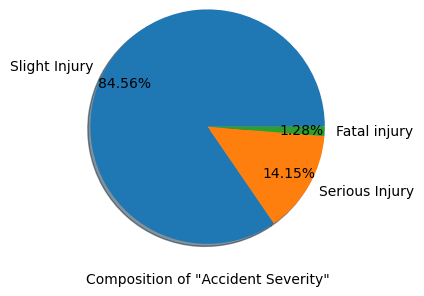

In [51]:
ax1=plt.subplot(1,2,2)
plt.pie(df_rta["accident_severity"].value_counts(),
       labels=list(df_rta["accident_severity"].unique()),
       autopct='%1.2f%%',
       pctdistance=0.8,
       shadow=True,
       radius=1.3,
       textprops={'fontsize':10}
       )
ax1.set_xlabel(" ")
plt.xlabel('Composition of "Accident Severity"', fontsize=10, labelpad=20)
plt.subplots_adjust(wspace=0.2)
plt.show()

In [52]:
plt.figure(figsize=(15,70))
plotnumber = 1

<Figure size 1500x7000 with 0 Axes>

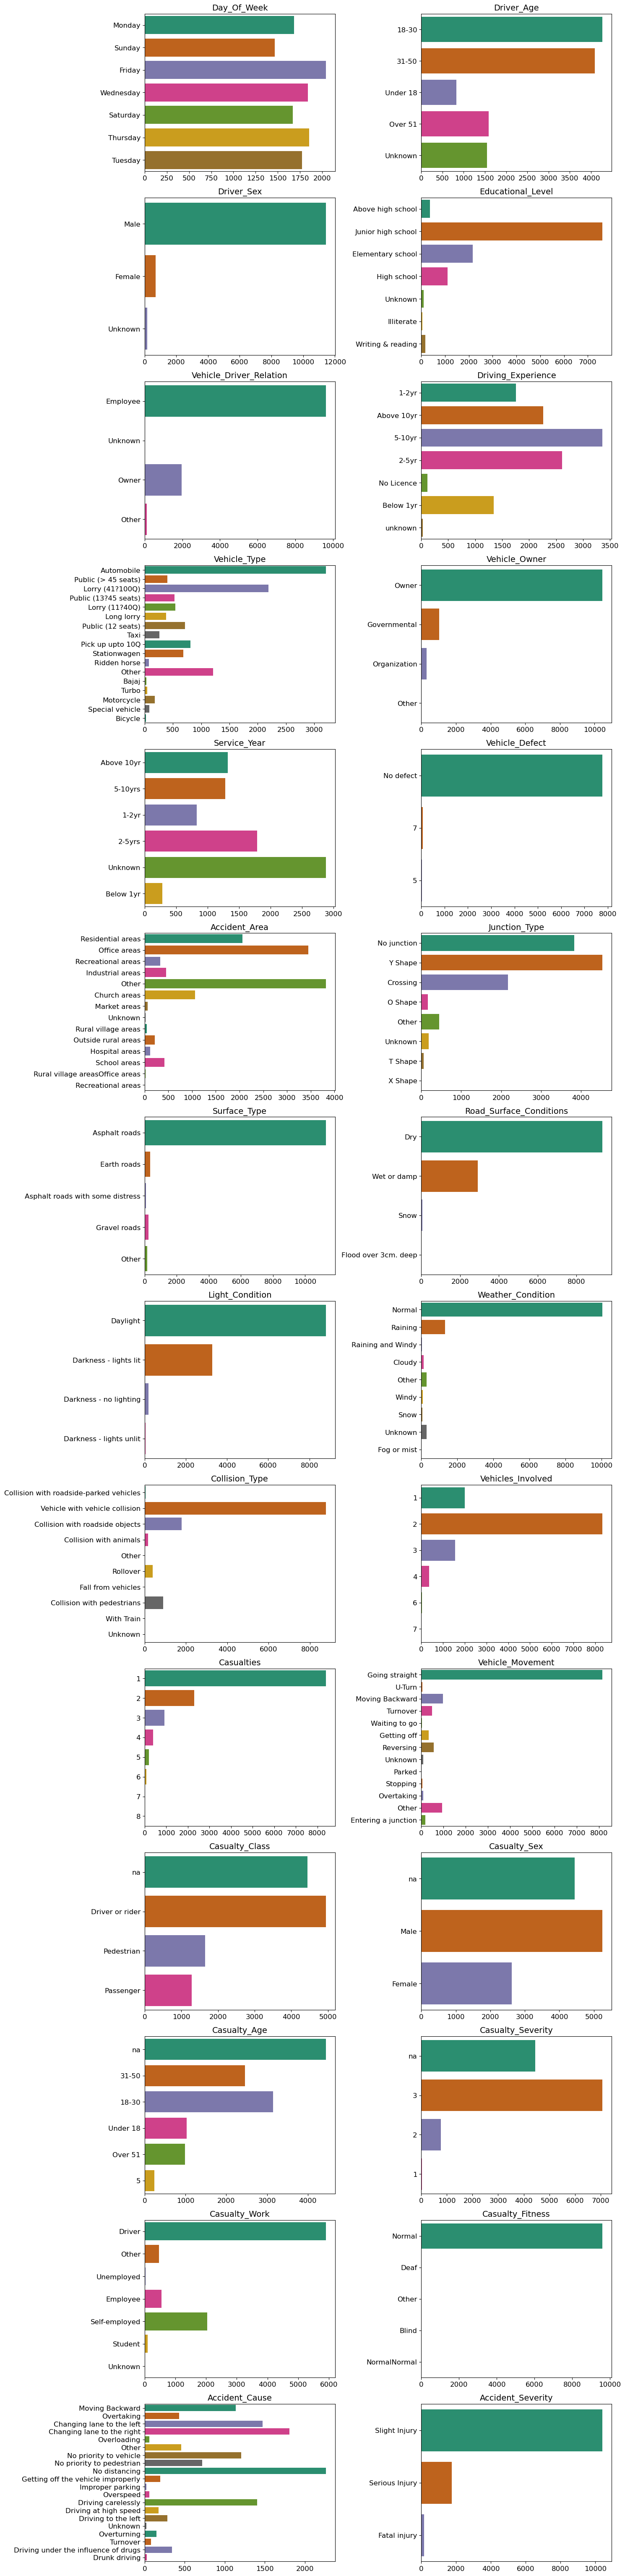

In [54]:
plt.figure(figsize=(15,70))
plotnumber = 1

for col in df_rta.drop(['hour', 'minute', 'lanes', 'road_allignment', 'pedestrian_movement'], axis=1):
    if plotnumber <= df_rta.shape[1]:
        ax1 = plt.subplot(16,2,plotnumber)
        sns.countplot(data=df_rta, y=col, palette='Dark2')
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.title(col.title(), fontsize=14)
        plt.xlabel('')
        plt.ylabel('')
    plotnumber +=1
plt.tight_layout()

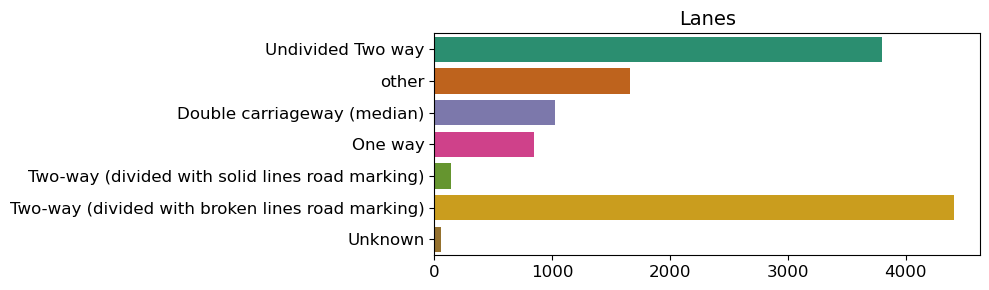

In [55]:
plt.figure(figsize=(10,3))
sns.countplot(data=df_rta, y='lanes', palette = 'Dark2')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Lanes', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

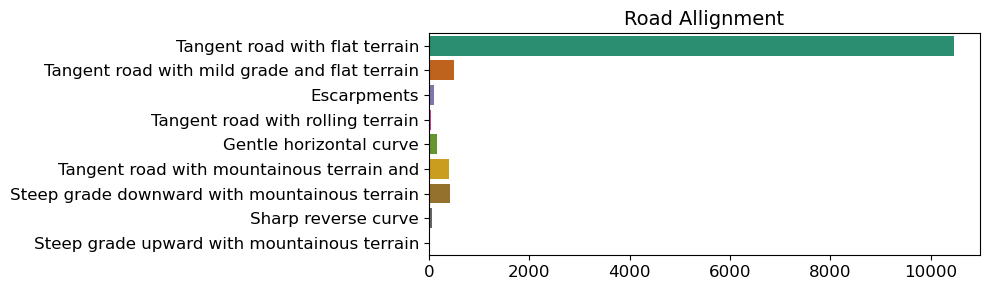

In [56]:
plt.figure(figsize=(10,3))
sns.countplot(data=df_rta, y='road_allignment', palette = 'Dark2')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Road Allignment', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

C:\Users\HP\AppData\Local\Temp\ipykernel_20396\3963888207.py:8: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.



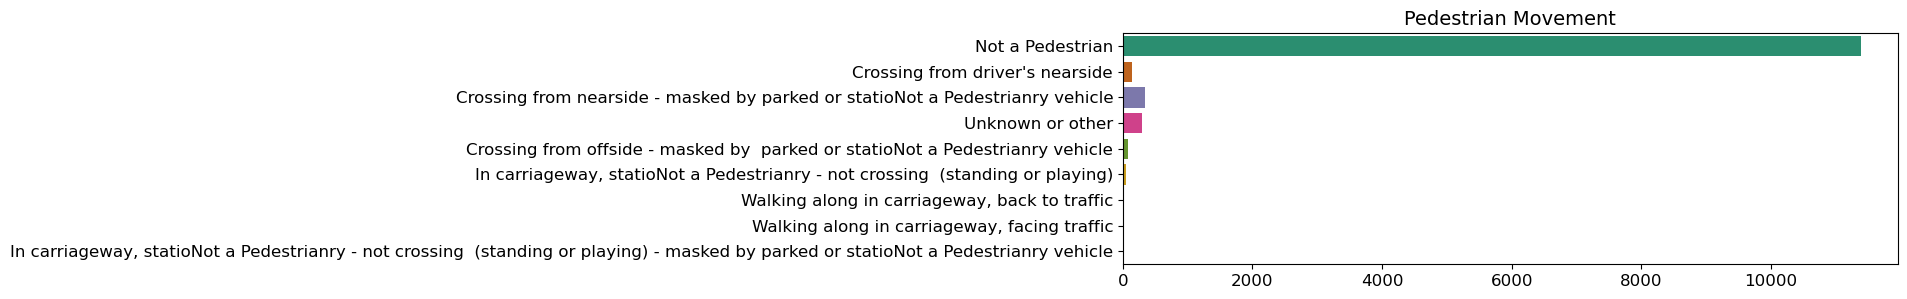

In [57]:
plt.figure(figsize=(10,3))
sns.countplot(data=df_rta, y='pedestrian_movement', palette = 'Dark2')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Pedestrian Movement', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

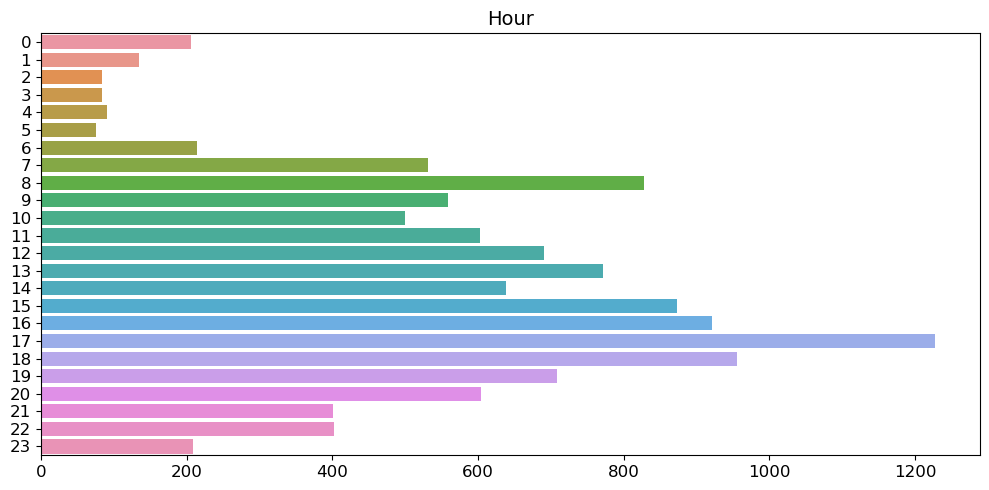

In [58]:
plt.figure(figsize=(10,5))
sns.countplot(data=df_rta, y='hour')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Hour', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

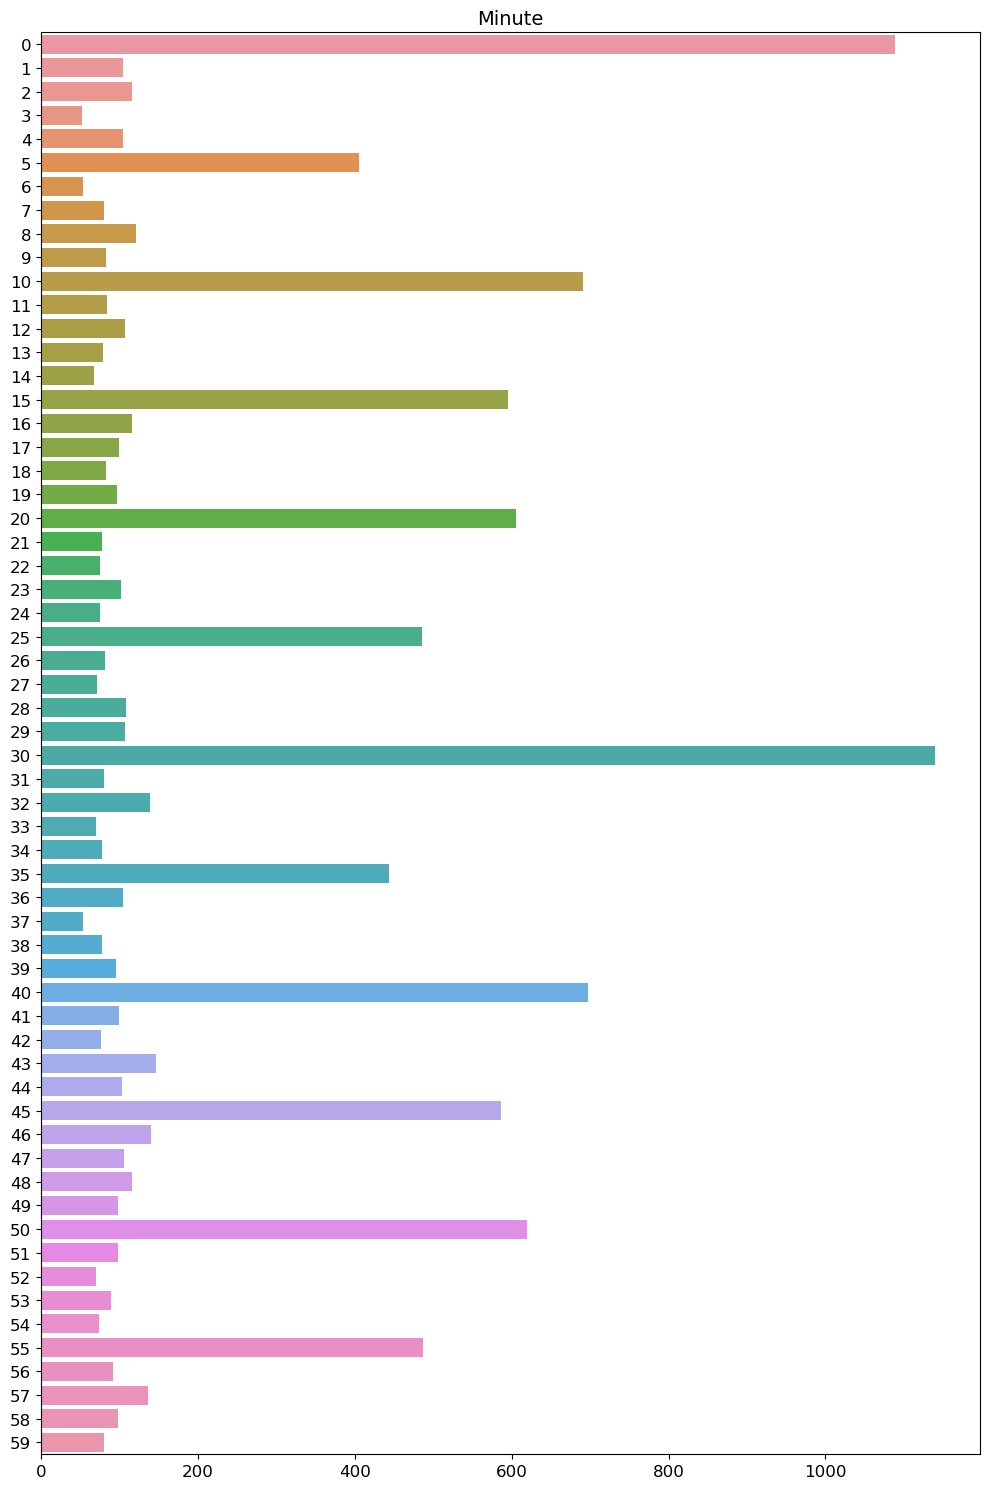

In [59]:
plt.figure(figsize=(10,15))
sns.countplot(data=df_rta, y='minute')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Minute', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

In [ ]:
# Observations:
Most of the accidents:

  *involved 2 vehicles and 2 casualties
    *occured on Fridays and after noon hours
Most of the drivers:

   *are male and in 18-30 yrs age group
    *have only went upto Junior high school and are employees
    *have 5-10 yrs of driving experience
    *Most of the accidents happened with personally owned passenger vehicles.

Most of the drivers have met with accident on:

   *two-way lanes
    *tangent road with flat terrains
    *Y shaped junctions
    *asphalt roads
    *day time
    *normal weather conditions
Most of the casualties:

   *happened to physically fit male drivers
    are of severity 3
The conditions on which most of the drivers met with the accident are:

   *vehicle to vehicle collision
    *straight movement
    *no pedestrian accidents
        *Not keeping enough distance between the vehicles was the major cause for most of the accidents and majority of the accidents resulted in slight injury.

Observations:
   *Most of the accidents have taken place between 3pm to 6pm with maximum numbers at 5 pm
    *Most of the time in minutes seems to have been recorded in intervals of 5 minutes for the sake of convenience. Hence more numbers to be seen at the 0 and 30 minutes.

In [60]:
min = list(range(5,56, 5))
def convert_minutes(x: int):
    for m in min:
        if x % m == x and x > m-5:
            return m
        if x in [56,57,58,59]:
            return 0
        if x in min+[0]:
            return x

In [61]:
df_rta["minute"]=df_rta["minute"].apply(lambda x: convert_minutes(x))

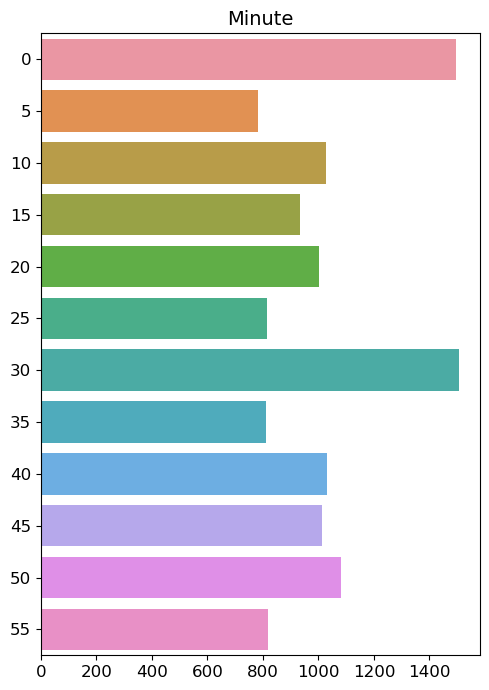

In [63]:
plt.figure(figsize=(5,7))
sns.countplot(data=df_rta, y='minute')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Minute', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

In [66]:
num_cols=df_rta.dtypes[df_rta.dtypes=='int64'].index.tolist()
cat_cols=df_rta.dtypes[df_rta.dtypes!='int64'].index.tolist()
df_rta[cat_cols]

day_of_week driver_age driver_sex   educational_level  \
0          Monday      18-30       Male   Above high school   
1          Monday      31-50       Male  Junior high school   
2          Monday      18-30       Male  Junior high school   
3          Sunday      18-30       Male  Junior high school   
4          Sunday      18-30       Male  Junior high school   
...           ...        ...        ...                 ...   
12311   Wednesday      31-50       Male                 NaN   
12312      Sunday    Unknown       Male   Elementary school   
12313      Sunday    Over 51       Male  Junior high school   
12314      Sunday      18-30     Female  Junior high school   
12315      Sunday      18-30       Male  Junior high school   

      vehicle_driver_relation driving_experience         vehicle_type  \
0                    Employee              1-2yr           Automobile   
1                    Employee         Above 10yr  Public (> 45 seats)   
2                    Employee              1-2yr      Lorry (41?100Q)   
3                    Employee             5-10yr  Public (> 45 seats)   
4                    Employee              2-5yr                  NaN   
...                       ...                ...                  ...   
12311                Employee              2-5yr       Lorry (11?40Q)   
12312                Employee             5-10yr           Automobile   
12313                Employee             5-10yr                Bajaj   
12314                Employee         Above 10yr      Lorry (41?100Q)   
12315                Employee             5-10yr                Other   

      vehicle_owner service_year vehicle_defect  ... vehicle_movement  \
0             Owner   Above 10yr      No defect  ...   Going straight   
1             Owner      5-10yrs      No defect  ...   Going straight   
2             Owner          NaN      No defect  ...   Going straight   
3      Governmental          NaN      No defect  ...   Going straight   
4             Owner      5-10yrs      No defect  ...   Going straight   
...             ...          ...            ...  ...              ...   
12311         Owner          NaN      No defect  ...   Going straight   
12312         Owner          NaN      No defect  ...            Other   
12313         Owner       2-5yrs      No defect  ...            Other   
12314         Owner       2-5yrs      No defect  ...            Other   
12315         Owner       2-5yrs      No defect  ...         Stopping   

        casualty_class casualty_sex casualty_age casualty_severity  \
0                   na           na           na                na   
1                   na           na           na                na   
2      Driver or rider         Male        31-50                 3   
3           Pedestrian       Female        18-30                 3   
4                   na           na           na                na   
...                ...          ...          ...               ...   
12311               na           na           na                na   
12312               na           na           na                na   
12313  Driver or rider         Male        31-50                 3   
12314               na           na           na                na   
12315       Pedestrian       Female            5                 3   

      casualty_work casualty_fitness  \
0               NaN              NaN   
1               NaN              NaN   
2            Driver              NaN   
3            Driver           Normal   
4               NaN              NaN   
...             ...              ...   
12311        Driver           Normal   
12312        Driver           Normal   
12313        Driver           Normal   
12314        Driver           Normal   
12315        Driver           Normal   

                                     pedestrian_movement  \
0                                       Not a Pedestrian   
1                                       Not a Pedestr

In [68]:
df_rta[num_cols]

vehicles_involved  casualties  hour  minute
0                      2           2    17       5
1                      2           2    17       5
2                      2           2    17       5
3                      2           2     1      10
4                      2           2     1      10
...                  ...         ...   ...     ...
12311                  2           1    16      15
12312                  2           1    18       0
12313                  1           1    13      55
12314                  2           1    13      55
12315                  2           1    13      55

[12316 rows x 4 columns]

In [ ]:
## Preprocessing

In [69]:
df_rta.isnull().sum()[df_rta.isna().sum() !=0] *100/len(df_rta)

educational_level           6.016564
vehicle_driver_relation     4.701202
driving_experience          6.731082
vehicle_type                7.713543
vehicle_owner               3.913608
service_year               31.893472
vehicle_defect             35.945112
accident_area               1.940565
lanes                       3.126015
road_allignment             1.152972
junction_type               7.202014
surface_type                1.396557
collision_type              1.258525
vehicle_movement            2.500812
casualty_work              25.966223
casualty_fitness           21.394933
dtype: float64

In [71]:
impute_cols = [x for x in df_rta.isna().sum()[df_rta.isna().sum() != 0].index.tolist()]
for feat in impute_cols:
    mode = df_rta[feat].mode()[0]
    df_rta[feat].fillna(mode, inplace=True)
    df_rta[feat].fillna(mode, inplace=True)

In [73]:
df_rta.isna().sum()

day_of_week                0
driver_age                 0
driver_sex                 0
educational_level          0
vehicle_driver_relation    0
driving_experience         0
vehicle_type               0
vehicle_owner              0
service_year               0
vehicle_defect             0
accident_area              0
lanes                      0
road_allignment            0
junction_type              0
surface_type               0
road_surface_conditions    0
light_condition            0
weather_condition          0
collision_type             0
vehicles_involved          0
casualties                 0
vehicle_movement           0
casualty_class             0
casualty_sex               0
casualty_age               0
casualty_severity          0
casualty_work              0
casualty_fitness           0
pedestrian_movement        0
accident_cause             0
accident_severity          0
hour                       0
minute                     0
dtype: int64

In [74]:
from sklearn.preprocessing import LabelEncoder
df_rta=df_rta.apply(LabelEncoder().fit_transform)

In [75]:
df_rta.accident_severity.value_counts()

2    10415
1     1743
0      158
Name: accident_severity, dtype: int64

In [76]:
x= df_rta.drop("accident_severity",axis=1)
y=df_rta["accident_severity"]

In [77]:
x.head()

day_of_week  driver_age  driver_sex  educational_level  \
0            1           0           1                  0   
1            1           1           1                  4   
2            1           0           1                  4   
3            3           0           1                  4   
4            3           0           1                  4   

   vehicle_driver_relation  driving_experience  vehicle_type  vehicle_owner  \
0                        0                   0             0              3   
1                        0                   3            11              3   
2                        0                   0             5              3   
3                        0                   2            11              0   
4                        0                   1             0              3   

   service_year  vehicle_defect  ...  casualty_class  casualty_sex  \
0             3               2  ...               3             2   
1             2               2  ...               3             2   
2             5               2  ...               0             1   
3             5               2  ...               2             0   
4             2               2  ...               3             2   

   casualty_age  casualty_severity  casualty_work  casualty_fitness  \
0             5                  3              0                 2   
1             5                  3              0                 2   
2             1                  2              0                 2   
3             0                  2              0                 2   
4             5                  3              0                 2   

   pedestrian_movement  accident_cause  hour  minute  
0                    5               9    17       1  
1                    5              16    17       1  
2                    5               0    17       1  
3                    5               1     1       2  
4                    5              16     1       2  

[5 rows x 32 columns]

In [78]:
y.value_counts()

2    10415
1     1743
0      158
Name: accident_severity, dtype: int64

<AxesSubplot:>

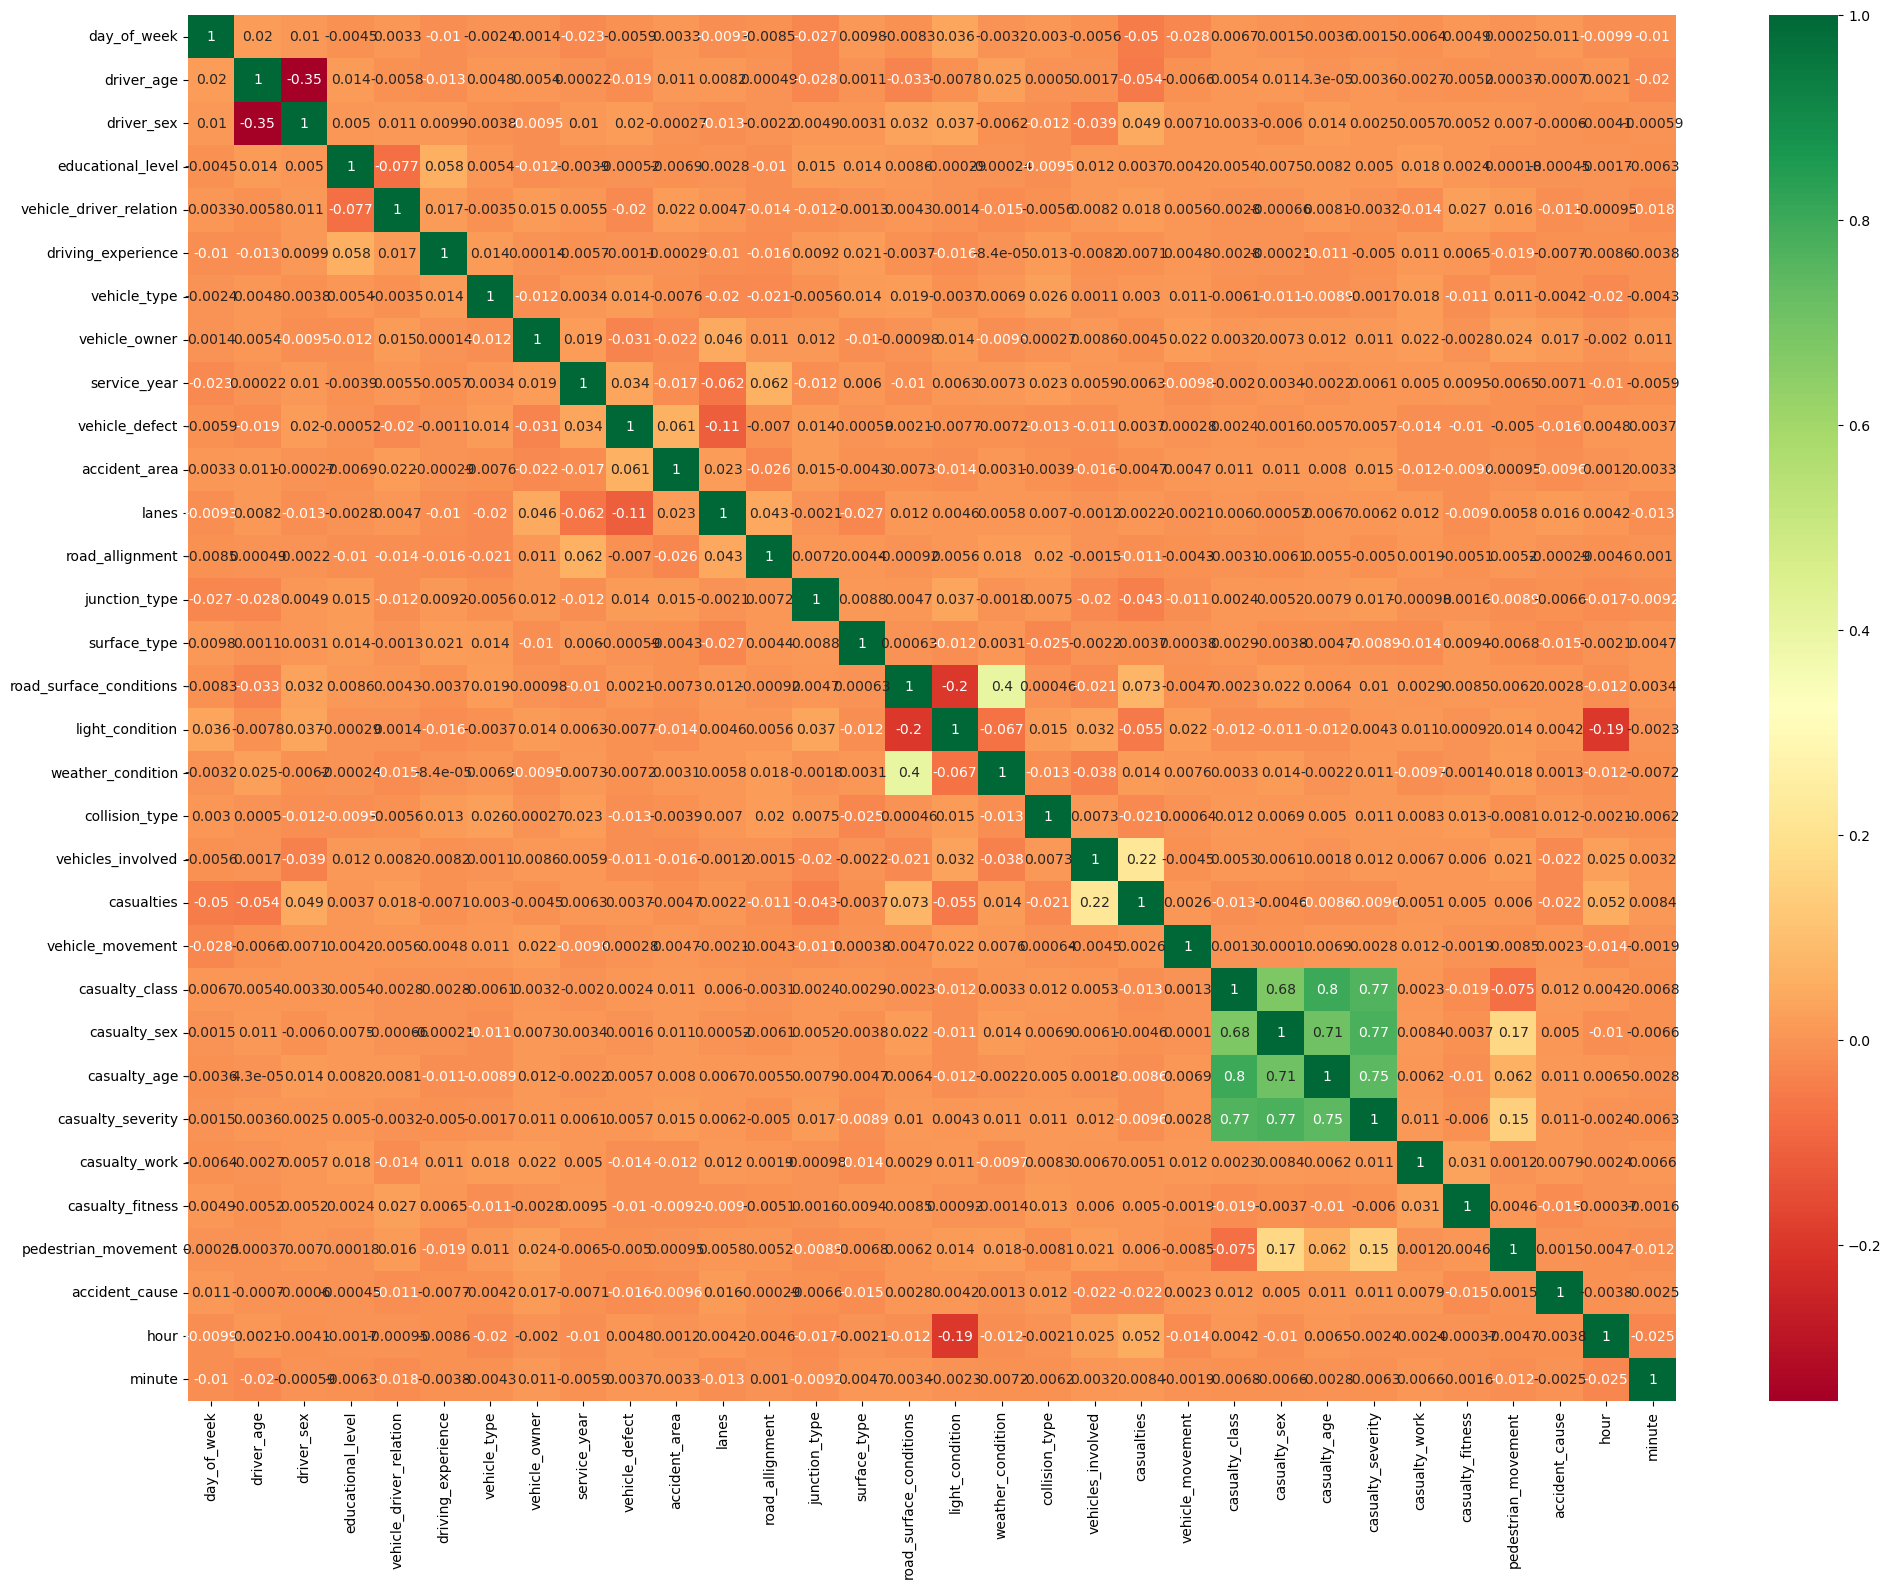

In [79]:
plt.figure(figsize=(24,18))
sns.heatmap(x.corr(),annot=True,cmap="RdYlGn")

In [81]:
from sklearn.ensemble import ExtraTreesRegressor
selection=ExtraTreesRegressor()
selection.fit(x, y)

ExtraTreesRegressor()

In [82]:
print(selection.feature_importances_)

[0.06096986 0.04047814 0.01088713 0.0326219  0.01945685 0.04160533
 0.04104591 0.01509878 0.03293201 0.0028312  0.04205493 0.03784779
 0.02461511 0.04085864 0.01405249 0.02426143 0.02711465 0.02329806
 0.02816097 0.04807272 0.04857711 0.03871176 0.01956486 0.01787925
 0.02231453 0.01489029 0.0276932  0.00416317 0.01595328 0.04515167
 0.07229048 0.06454649]


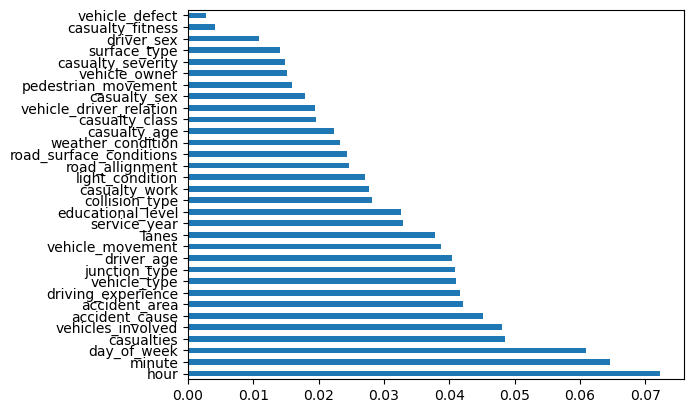

<Figure size 1500x700 with 0 Axes>

In [83]:
feat_importances=pd.Series(selection.feature_importances_,index=x.columns)
feat_importances.nlargest(32).plot(kind="barh")
plt.figure(figsize=(15,7))
plt.show()

In [84]:
x.drop(columns=["vehicle_defect","casualty_fitness","driver_sex","surface_type"],inplace=True)

In [85]:
from collections import Counter
!pip install imblearn

In [86]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [87]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(8621, 28) (3695, 28) (8621,) (3695,)


In [88]:
smote=SMOTE()
x_train_smote,y_train_smote=smote.fit_resample(x_train,y_train)

In [89]:
from collections import Counter
print("before smote :",Counter(y_train))
print("after smote :",Counter(y_train_smote))

before smote : Counter({2: 7324, 1: 1191, 0: 106})
after smote : Counter({2: 7324, 1: 7324, 0: 7324})


In [91]:
!pip install tpot

     ---------------------------------------- 87.2/87.2 kB 4.8 MB/s eta 0:00:00
     ---------------------------------------- 89.1/89.1 MB 8.1 MB/s eta 0:00:00
     ---------------------------------------- 114.3/114.3 kB ? eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11956 sha256=3deee0e04cefb63017f928641ee2cf03d4fd4f7bc749f61c1d2f8defcaca2a45
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\48\8c\93\3afb1916772591fe6bcc25cdf8b1c5bdc362f0ec8e2f0fd413
Successfully built stopit
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [93]:
#TPOT, which stands for Tree-based Pipeline Optimization Tool.
from tpot import TPOTClassifier

In [94]:
pipeline_optimizer = TPOTClassifier(generations=5, population_size=20, cv=5,random_state=42, verbosity=2)

In [95]:
pipeline_optimizer.fit(x_train, y_train)

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8534972258650256

Generation 2 - Current best internal CV score: 0.8534972258650256

Generation 3 - Current best internal CV score: 0.8534972258650256

Generation 4 - Current best internal CV score: 0.8534972258650256

Generation 5 - Current best internal CV score: 0.854772991694408

Best pipeline: ExtraTreesClassifier(XGBClassifier(input_matrix, learning_rate=0.001, max_depth=2, min_child_weight=11, n_estimators=100, n_jobs=1, subsample=0.25, verbosity=0), bootstrap=False, criterion=gini, max_features=0.8, min_samples_leaf=8, min_samples_split=8, n_estimators=100)


TPOTClassifier(generations=5, population_size=20, random_state=42, verbosity=2)

In [97]:
print(pipeline_optimizer.score(x_test, y_test))

0.842489851150203


C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py:765: FutureWarning:

sklearn.metrics.SCORERS is deprecated and will be removed in v1.3. Please use sklearn.metrics.get_scorer_names to get a list of available scorers and sklearn.metrics.get_metric to get scorer.



In [98]:
#pipeline_optimizer.export('tpot_exported_pipeline.py')

In [99]:
y_pred=pipeline_optimizer.predict(x_test)

In [101]:
from sklearn.metrics import (accuracy_score, 
                            classification_report,
                            recall_score, precision_score, f1_score,
                            confusion_matrix)

In [102]:
print("accuracy:",accuracy_score(y_test,y_pred))
print("f1_score:",f1_score(y_test,y_pred,average="weighted"))

accuracy: 0.842489851150203
f1_score: 0.7813853074510815
